# Hazard: Landslides

The `landslide` class inherits from the `hazard` class. Other than some of the hazard modules available in `climada`, the landslide module does not run a physical model in its background. Rather, this tutorial is a suggestion of how to handle two different types of hazard source files (in one case, already the finished product of some model output, in the other case just a historic data collection).

We propose 2 different types of landslide hazard datasets that the module's methods work well with: 
* *historic landslides*: historic, point-shaped event sets based on the NASA COOLR global landslide catalogue, continuously updated.
* *probabilistic landslides*: two raster files on probabilistic LS hazard, one for landslides triggered by precipitation and one for landslides triggered by earthquakes, based on data from the Norwegian Geotechnical Institute (NGI) for UNEP GRID, last improved 2018.

The module comes with three main functions:
* `set_ls_hist()`
* `set_ls_prob()`
* `sample_events_from_probs()`

### Option 1: historic landslide events: NASA COOLR initiative
Data from the global landslide catalogue is continuously updated as part of the Cooperative Open Online Landslide Repository (https://pmm.nasa.gov/landslides/coolrdata.html#download). The data consists in points representing an approximate occurence location, without spatial extent and any kind of "intensity" (binary events).

The most recent version of the dataset should always be downloaded by going to the link > "Open Landslide Viewer" (takes some time to load) > click "Download the full Landslide Catalog" > selecting the "NASA Global Landslide Catalog Points (Shapefile)" for download.

Download and unzip the up-to-date version.

In [2]:
import sys
path_climada =  'your_path_to_climada_python/' #e.g.: '/Users/evelynm/climada_python/'
sys.path.append(path_climada)

In [3]:
# Loading packages
%matplotlib inline
from climada.hazard.landslide import Landslide

The historic landslide events are then directly read into a landslide hazard set.
We create an empty `Landslide()` instance and fill it with all historic data available from the catalog in the desired bounding box.

/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


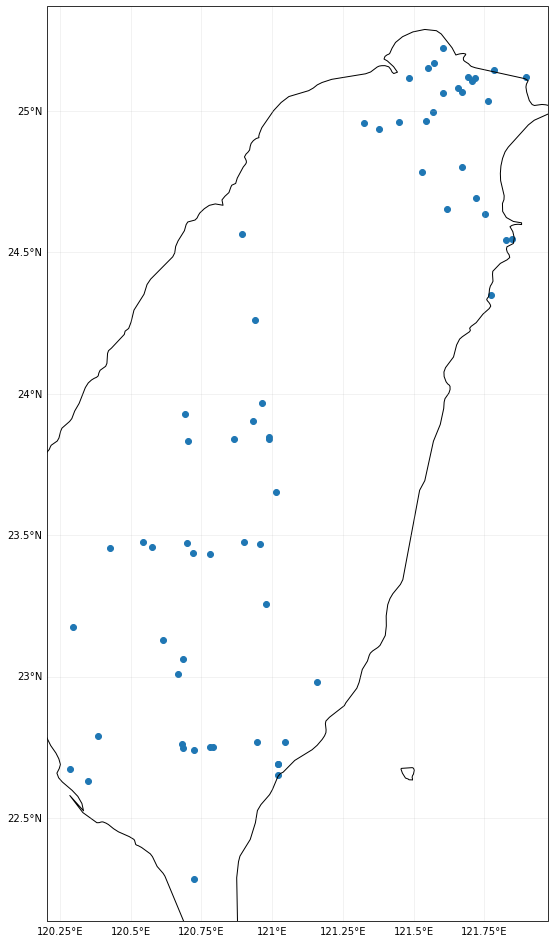

In [4]:
path_COOLR = 'your path to folder nasa_global_landslide_catalog_point.shp' #e.g.: '/Users/evelynm/climada_python/data/system/nasa_global_landslide_catalog_point/nasa_global_landslide_catalog_point.shp'
bbox_taiwan = [25.5, 122.0, 21.0, 119.5]

# Example for Taiwan
haz_ls_Taiwan_hist = Landslide()
haz_ls_Taiwan_hist.set_ls_hist(bbox=bbox_taiwan, 
                               path_sourcefile=path_COOLR, 
                               check_plots=1)

As one can see, the historic hazard set stores incidents as POINT data, i.e. landslides have no physical extent.
At the moment, this is accounted for at a later step in the impact calculation (when assigning exposures within a certain radius around the hazard points to the hazard).

### Exemplary end-to-end impact calculation using the historic LS option

The steps below follow the normal routine of defining impact functions, getting an exposure, and performing an impact calculation based on the given historic hazard set.

*Impact functions* relate the hazard intensity to a percentage of damage in the exposure. For a detailed description on impact functions, check out the respective tutorial.

Since the historic landslides have no spatial extent, their intensity is simply put to "1" at the respective point of occurrence and a dummy step impact function is created for illustrative purposes, where damage (impact) is simply 100% when intensity (close to) 1, and 0 else.

In [5]:
from climada.entity import Exposures, Entity, LitPop
from climada.entity import ImpactFuncSet, ImpactFunc
from climada.engine import Impact
import numpy as np

/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


2021-01-28 09:24:23,642 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


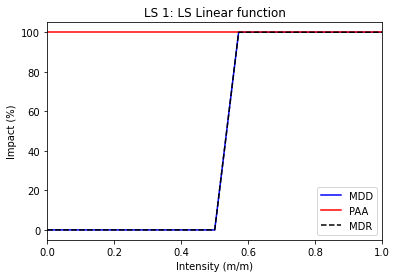

In [6]:
# Set impact function (see tutorial climada_entity_ImpactFuncSet)
if_LS_hist = ImpactFunc() 
if_LS_hist.haz_type = 'LS'
if_LS_hist.id = 1
if_LS_hist.name = 'LS Linear function'
if_LS_hist.intensity_unit = 'm/m'
if_LS_hist.intensity = np.linspace(0, 1, num=15)
if_LS_hist.mdd = np.sort(np.array([0,0,0,0,0,0,0,0,1., 1., 1., 1., 1., 1., 1.]))
if_LS_hist.paa = np.sort(np.linspace(1, 1, num=15))
if_LS_hist.check()
if_LS_hist.plot()
ifset_LS_hist = ImpactFuncSet()
ifset_LS_hist.append(if_LS_hist)

For a detailed description of the *Exposure* class, refer to the respective tutorial.
This LS tutorial uses the LitPop class, which models countries' gridded asset exposure by disaggregating a macroeconomic indicator (e.g. total asset value or GDP) proportional to the product of night light intensities ("Lit") and gridded population count ("Pop") per country.  

2021-01-28 09:24:28,098 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2021-01-28 09:24:37,347 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2021-01-28 09:24:53,763 - climada.util.finance - WARNING - No data available for country. Using non-financial wealth instead
2021-01-28 09:24:53,764 - climada.util.finance - WARNING - GDP data for TWN is not provided by World Bank.                        Instead, IMF data is returned here.
2021-01-28 09:24:54,331 - climada.entity.exposures.litpop - INFO - Creating the LitPop exposure took 27 s
2021-01-28 09:24:54,332 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2021-01-28 09:24:54,333 - climada.entity.exposures.base - INFO - centr_ not set.
2021-01-28 09:24:54,333 - climada.entity.exposures.base - INFO - deductible not set.
2021-01-28 09:24:54,334 - climada.entity.exposures.base - INFO - cover not set.
2021-01-28 09:24:54,334 - climada.entity.exposures.bas

/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-01-28 09:24:58,770 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/contextily/tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<

2021-01-28 09:25:15,429 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


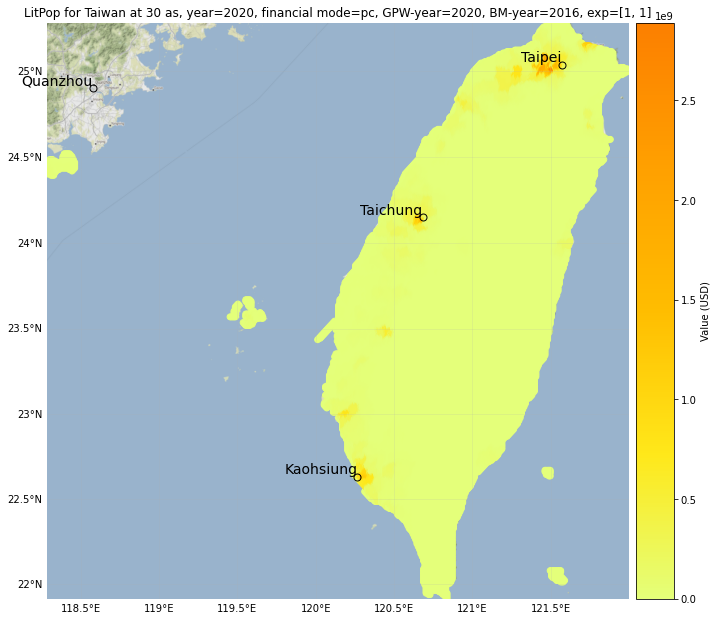

In [7]:
# Set LitPop exposure for Taiwan
exp_LS_hist = LitPop()
exp_LS_hist.set_country('Taiwan', reference_year = 2020)
exp_LS_hist.set_geometry_points()
exp_LS_hist.rename({'if_': 'if_LS'}, axis='columns')
exp_LS_hist = Exposures(exp_LS_hist)
exp_LS_hist.set_lat_lon()
exp_LS_hist.check()

# plot the exposure
exp_LS_hist.plot_basemap()

**Important note**: As mentioned before, the historic hazard set consists in POINT data, hence does not have any extent.
When assigning the centroids in the exposure to those of the hazard centroids, it is hence crucial to specify what radius around those points should be included. This is done using the _assign_centroids()_ method, where threshold refers to the radius in km.

In [8]:
# Set Entity    
ent_LS_hist = Entity()
ent_LS_hist.exposures = exp_LS_hist
ent_LS_hist.impact_funcs = ifset_LS_hist
# include exposures within 500m of the centroids (threshold=0.5)
exp_LS_hist.assign_centroids(haz_ls_Taiwan_hist, method='NN', distance='haversine',threshold=0.5)

2021-01-28 09:25:28,471 - climada.entity.exposures.base - INFO - Matching 46165 exposures with 64 centroids.
2021-01-28 09:25:28,729 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 0.5km for 46102 coordinates.


2021-01-28 09:26:30,501 - climada.engine.impact - INFO - Exposures matching centroids found in centr_LS
2021-01-28 09:26:30,504 - climada.engine.impact - INFO - Calculating damage for 63 assets (>0) and 64 events.
2021-01-28 09:26:30,505 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_LS. Using impact functions in if_.
2021-01-28 09:26:30,521 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333297333 to 0.008333333333297333.
Aggregated avg. annual impact is 88495320 $


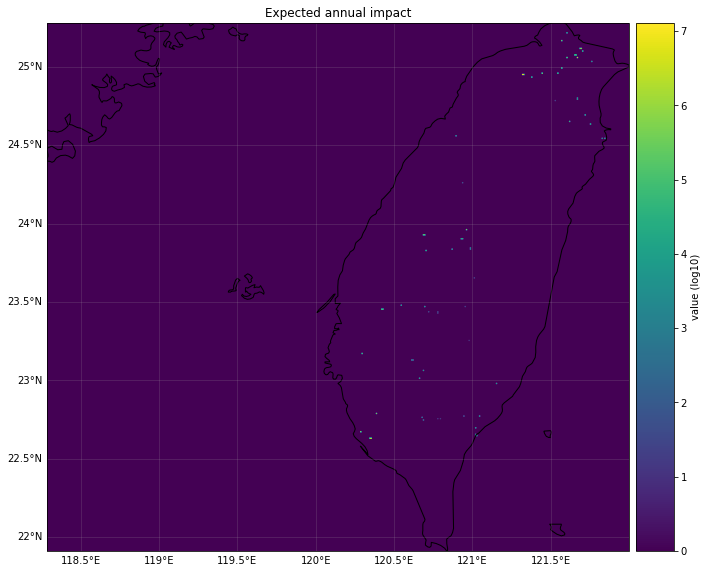

In [12]:
# Impact calculation from historic landslides, with exposure and impact function defined as above.
imp_LS_Taiwan_hist = Impact()
imp_LS_Taiwan_hist.calc(ent_LS_hist.exposures, ent_LS_hist.impact_funcs, haz_ls_Taiwan_hist)
imp_LS_Taiwan_hist.plot_raster_eai_exposure()
print(f'Aggregated avg. annual impact is {int(imp_LS_Taiwan_hist.aai_agg)} $')

### Option 2:  probabilistic landslide hazard (precipitation / earthquake-induced) from UNEP / NGI

The global probabilistic hazardsets are provided publicly by UNEP GRID and were developed by the Norwegian Geotechnical Institute (NGI).

Since the webservices are currently (as of 08/20) not working, please download the geoTIFFs manually:

- Go to https://preview.grid.unep.ch/index.php?preview=data&events=landslides&evcat=2&lang=eng for precipitation-triggered landslides.
- Go to https://preview.grid.unep.ch/index.php?preview=data&events=landslides&evcat=1&lang=eng for earthquake-triggered landslides.
- Unzip the folder and move it to a sensible location


The datasets are in units of expected annual probability and percentage of pixel of occurrence of a potentially destructive landslide event x 1000000 and include an estimate of the annual frequency of landslide triggered by precipitation / earthquakes. It depends on the combination of trigger and susceptibility defined by six parameters: slope factor, lithological (or geological) conditions, soil moisture condition, vegetation cover, precipitation and seismic conditions.


In [13]:
# Loading packages
%matplotlib inline
from climada.hazard.landslide import Landslide

Given how the external hazard set is defined ("expected annual probability and percentage of pixel of occurrence of a potentially destructive landslide event "), intensity and fraction are assigned a bit different from the normal hazard-reading method: 
- `intensity` takes a binary value (0 - no ls occurrence probability; 1 - ls occurrence probabilty >0)
- `fraction` stores the actual value of probability * fraction of affected pixel provided by the raster file 
- `frequency` is 1 everywhere, since the data represents annual occurrence probability.

Read the documentation for details. 
Also, since values in the NGI & UNEP files come as x1'000'000, we manually need to adjust the fraction by dividing through 1mio.

2021-01-28 09:34:20,932 - climada.util.coordinates - INFO - Reading /Users/evelynm/climada_python/data/system/ls_pr/ls_pr.tif
2021-01-28 09:34:21,056 - climada.util.coordinates - INFO - Reading /Users/evelynm/climada_python/data/system/ls_pr/ls_pr.tif


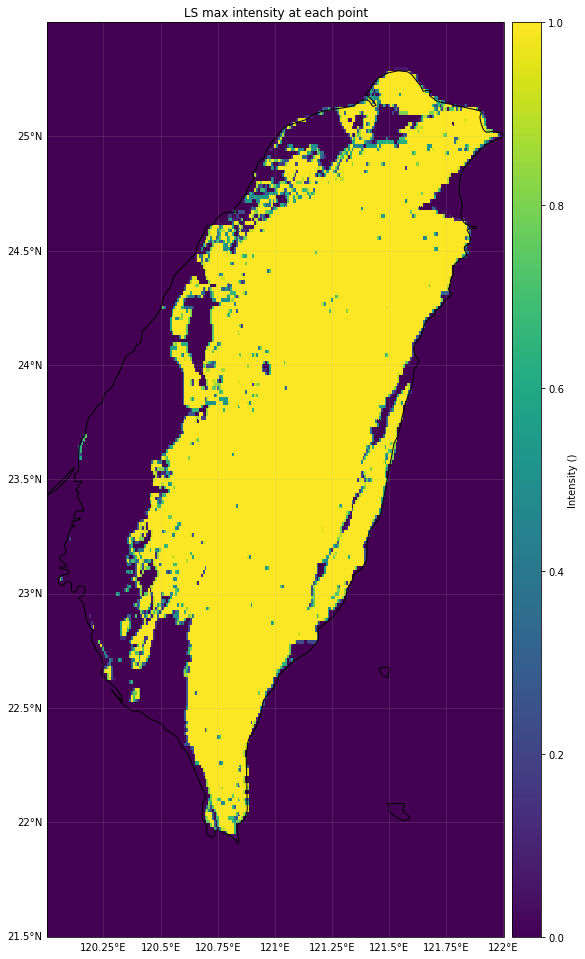

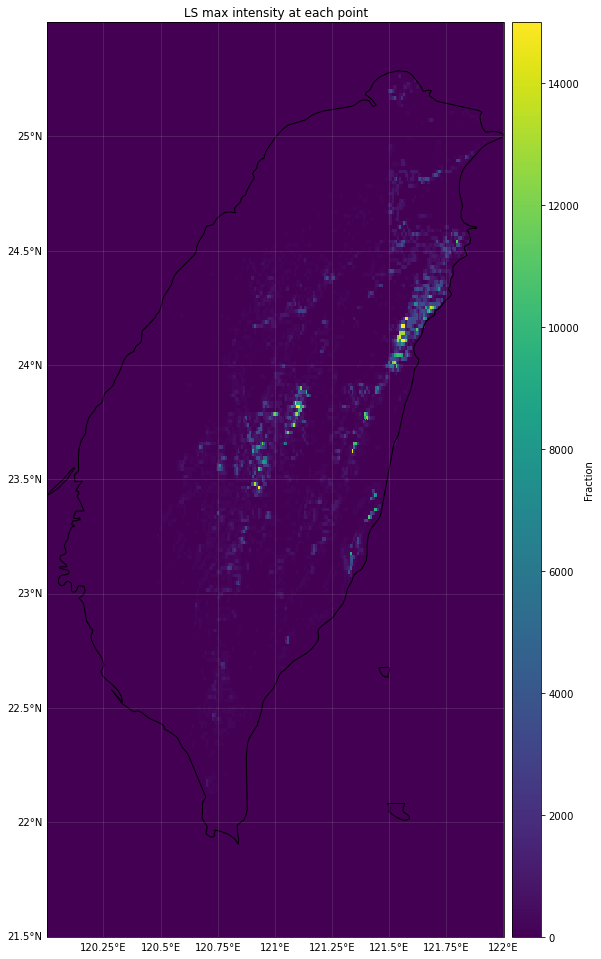

In [18]:
# Setting precipitation-triggered landslide hazard for Taiwan
haz_ls_taiwan_prob = Landslide()
bbox_taiwan = [25.5, 122.0, 21.5, 120.0]
path_lsfile = 'your path to ls_pr.tif' #e.g.'/Users/evelynm/climada_python/data/system/ls_pr/ls_pr.tif'
# The check-plots produce intensity (image 1) and fraction (image 2) plots
haz_ls_taiwan_prob.set_ls_prob(bbox=bbox_taiwan, path_sourcefile=path_lsfile, check_plots=1)

# IMPORTANT: adjust for the x1mio multiplication in the original dataset
haz_ls_taiwan_prob.fraction = haz_ls_taiwan_prob.fraction/10e6

With the hazard set loaded, it is now possible to calculate the expected damage for the simulated period:

In [19]:
from climada.entity import Exposures, Entity, LitPop
from climada.entity import ImpactFuncSet, ImpactFunc
from climada.engine import Impact
import numpy as np

**Important for impact calculations**: Since impact functions act on the intensity of a hazard, an our hazard takes on binary intensity values (0 = no LS prob, 1 = >0 LS prob), it makes sense to define some step-function around those two values. The impact calculation accounts for the fractions (% of affected pixel and actual annual probability) by multiplying them into the end-result, anyways, under the hood.

2021-01-28 09:38:10,478 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


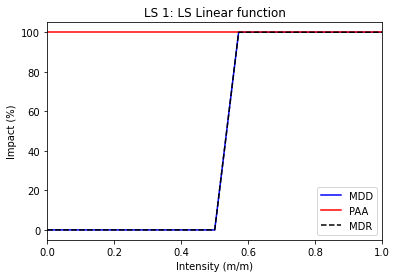

In [20]:
# Set impact function
if_LS_prob = ImpactFunc() 
if_LS_prob.haz_type = 'LS'
if_LS_prob.id = 1
if_LS_prob.name = 'LS Linear function'
if_LS_prob.intensity_unit = 'm/m'
if_LS_prob.intensity = np.linspace(0, 1, num=15)
if_LS_prob.mdd = np.sort(np.array([0,0,0,0,0,0,0,0,1., 1., 1., 1., 1., 1., 1.]))
if_LS_prob.paa = np.sort(np.linspace(1, 1, num=15))
if_LS_prob.check()
if_LS_prob.plot()
ifset_LS_prob = ImpactFuncSet()
ifset_LS_prob.append(if_LS_prob)

2021-01-28 09:38:13,966 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2021-01-28 09:38:22,921 - climada.entity.exposures.gpw_import - INFO - Reference year: 2019. Using nearest available year for GWP population data: 2020
2021-01-28 09:38:22,922 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2021-01-28 09:38:35,641 - climada.util.finance - WARNING - No data available for country. Using non-financial wealth instead
2021-01-28 09:38:35,641 - climada.util.finance - WARNING - GDP data for TWN is not provided by World Bank.                        Instead, IMF data is returned here.
2021-01-28 09:38:36,192 - climada.entity.exposures.litpop - INFO - Creating the LitPop exposure took 23 s
2021-01-28 09:38:36,193 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2021-01-28 09:38:36,194 - climada.entity.exposures.base - INFO - centr_ not set.
2021-01-28 09:38:36,194 - climada.entity.exposures.base - INFO - de

/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-01-28 09:38:40,253 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/contextily/tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<

2021-01-28 09:38:44,775 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


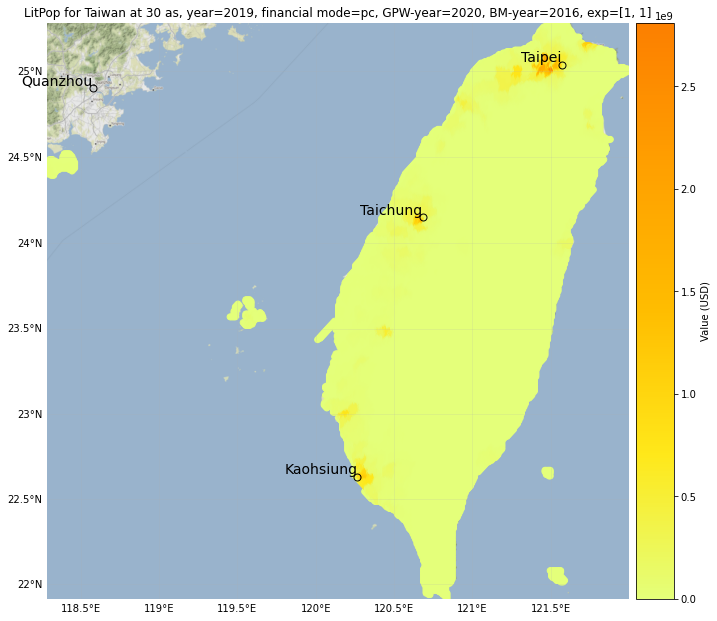

In [21]:
# Set exposure for Taiwan:
exp_LS_prob = LitPop()
exp_LS_prob.set_country('Taiwan', reference_year = 2019)
exp_LS_prob.set_geometry_points()
exp_LS_prob.rename({'if_': 'if_LS'}, axis='columns')
exp_LS_prob = Exposures(exp_LS_prob)
exp_LS_prob.set_lat_lon()
exp_LS_prob.check()

# plot exposure
exp_LS_prob.plot_basemap()

In [22]:
# Set Entity    
ent_LS_prob = Entity()
ent_LS_prob.exposures = exp_LS_prob
ent_LS_prob.impact_funcs = ifset_LS_prob

2021-01-28 09:38:54,339 - climada.entity.exposures.base - INFO - Matching 46165 exposures with 115921 centroids.
2021-01-28 09:38:54,347 - climada.engine.impact - INFO - Calculating damage for 45801 assets (>0) and 1 events.
2021-01-28 09:38:54,348 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_LS. Using impact functions in if_.
2021-01-28 09:38:54,386 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333297333 to 0.008333333333297333.


/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/evelynm/opt/anaconda3/envs/climada_newenv/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


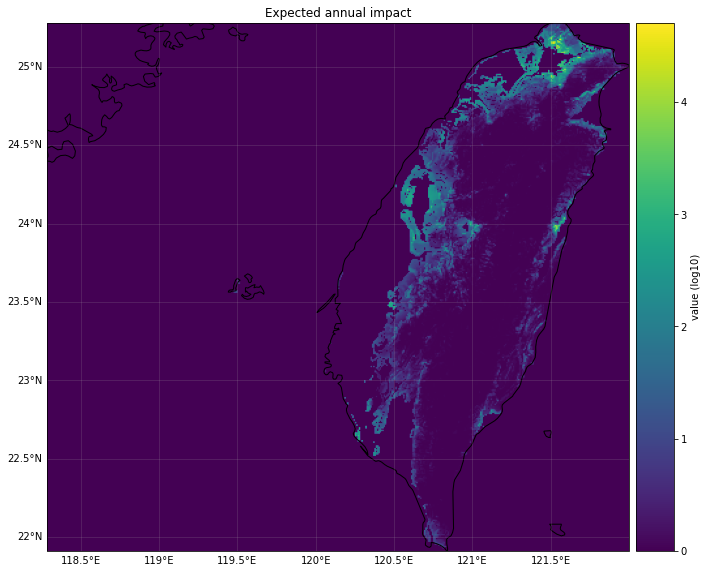

In [23]:
# Set impact for probabilistic simulation
imp_LS_Taiwan_prob_I = Impact()
imp_LS_Taiwan_prob_I.calc(ent_LS_prob.exposures, ent_LS_prob.impact_funcs, haz_ls_taiwan_prob)
imp_LS_Taiwan_prob_I.plot_raster_eai_exposure()

Last remark: Be aware that this is the *expected annual impact (AED)*, given that the hazard set incorporates *annual* probabilities of an event.

### Addendum: Generating event sets for a time span from annual probability map

Given that the UNEP & NGI hazard map provides annual probabilities of a slide happening in every grid cell, one may use this to create event sets for a specific time span.

Say we want an event set which is representative of 500 years:

We can call another method on our probabilistic landlide hazard for this:


In [25]:
# Creating events for a 500year timespan from the probabilistic hazard 

# take the probabilistic hazard as starting point
haz_ls_taiwan_500yevents = Landslide()
bbox_taiwan = [25.5, 122.0, 21.5, 120.0]
path_lsfile = '/Users/evelynm/climada_python/data/system/ls_pr/ls_pr.tif'
haz_ls_taiwan_500yevents.set_ls_prob(bbox=bbox_taiwan, path_sourcefile=path_lsfile, check_plots=0)
haz_ls_taiwan_500yevents.fraction = haz_ls_taiwan_500yevents.fraction/10e6

# binomial sample of annual occurrence probabilities to events
haz_ls_taiwan_500yevents.sample_events_from_probs(n_years=500)

2021-01-28 09:40:17,572 - climada.util.coordinates - INFO - Reading /Users/evelynm/climada_python/data/system/ls_pr/ls_pr.tif
2021-01-28 09:40:17,687 - climada.util.coordinates - INFO - Reading /Users/evelynm/climada_python/data/system/ls_pr/ls_pr.tif


Produced 381.0 landslide events for Taiwan in a 500 year period


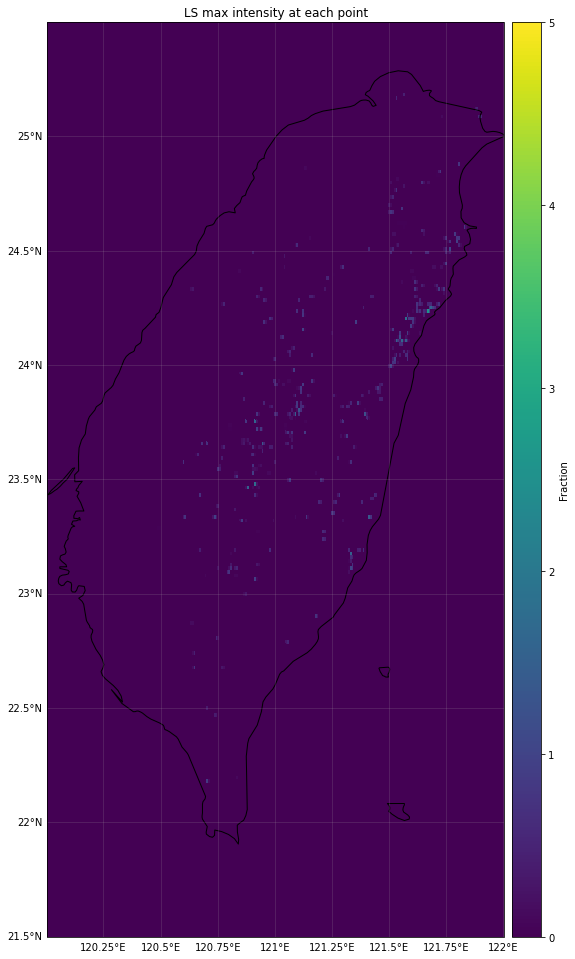

In [28]:
#let's take a look at where we generated LS occurrences for a 500-year period:
haz_ls_taiwan_500yevents.plot_fraction(0)
print(f'Produced {haz_ls_taiwan_500yevents.fraction.sum()} landslide events for Taiwan in a 500 year period')